In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Data Preparation. Check data quality and clean up.

In [2]:
df = pd.read_csv("inpatientCharges.csv")
pd.set_option('display.max_columns', None)
df.head(20)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,$11977.13,$5834.74,$4761.41
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,$35841.09,$8031.12,$5858.50
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,$28523.39,$6113.38,$5228.40
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,$75233.38,$5541.05,$4386.94


In [3]:
len(df['Provider City'].unique())

1977

In [4]:
df.shape

(163065, 12)

In [5]:
df.isna().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [7]:
df.columns = ['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges',
       'Average Total Payments', 'Average Medicare Payments']
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

# 2. EDA. In your EDA you need to show:

## The distribution of single variable

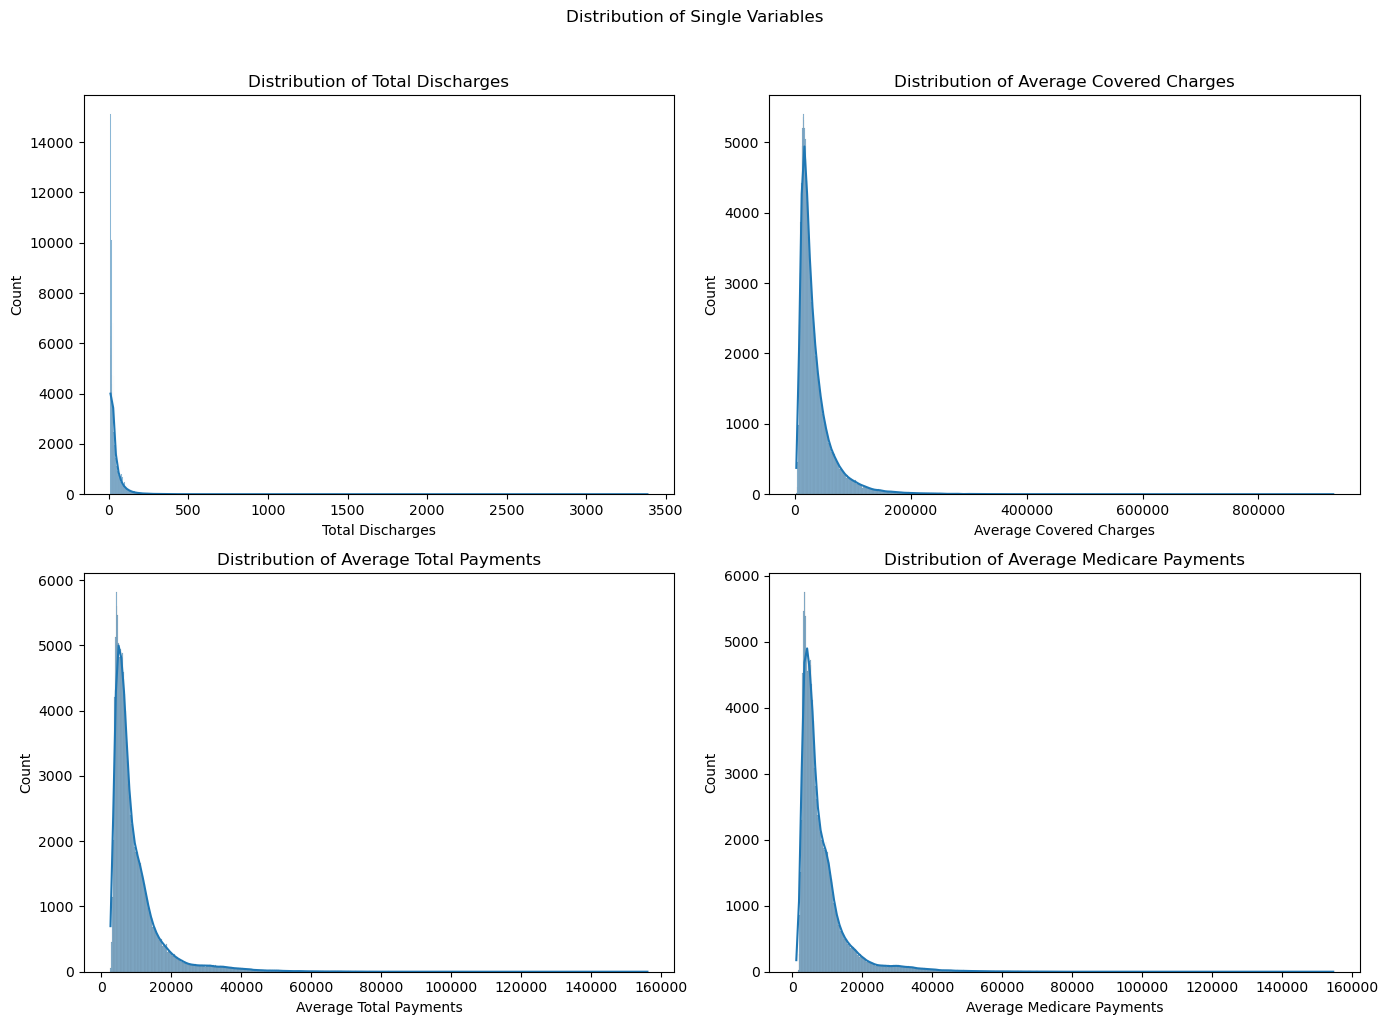

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
# Convert monetary columns to numeric
monetary_columns = ['Average Covered Charges','Average Total Payments', 'Average Medicare Payments']
df[monetary_columns] = df[monetary_columns].replace('[\$,]', '', regex=True).astype(float)

df[monetary_columns] = df[monetary_columns].replace('[\$,]', '', regex=True).astype(float)

# Distribution of Single Variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution of Single Variables', y=1.02)

# 1. Total Discharges
sns.histplot(df['Total Discharges'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Discharges')

# 2. Average Covered Charges
sns.histplot(df['Average Covered Charges'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Covered Charges')

# 3. Average Total Payments
sns.histplot(df['Average Total Payments'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average Total Payments')

# 4. Average Medicare Payments
sns.histplot(df['Average Medicare Payments'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Average Medicare Payments')

plt.tight_layout()
plt.show()


# The distribution of one variable by another categorical variable

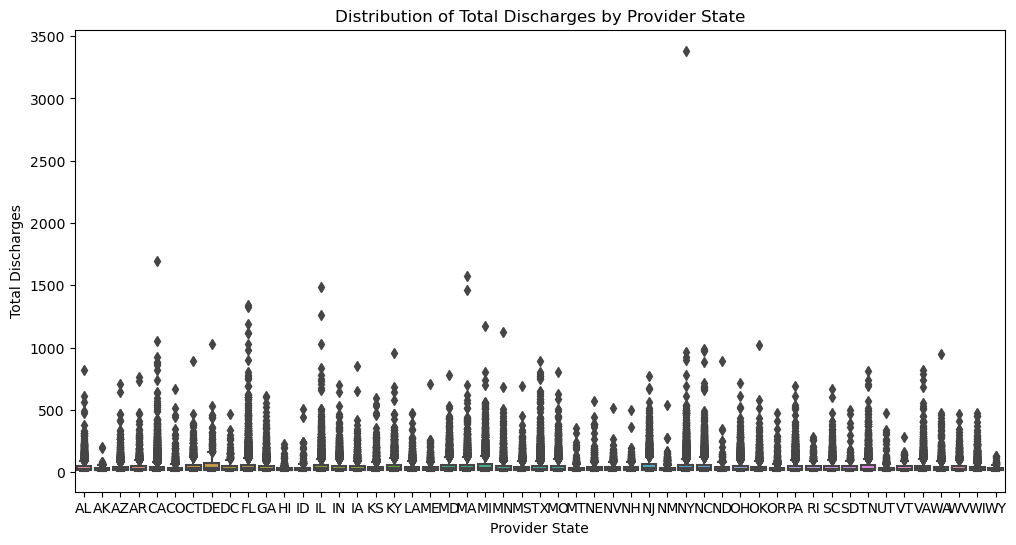

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
# Remove leading and trailing spaces in column names
# Convert monetary columns to numeric
monetary_columns = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Distribution of Total Discharges by Provider State using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Provider State', y='Total Discharges', data=df)
plt.title('Distribution of Total Discharges by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Total Discharges')
plt.show()


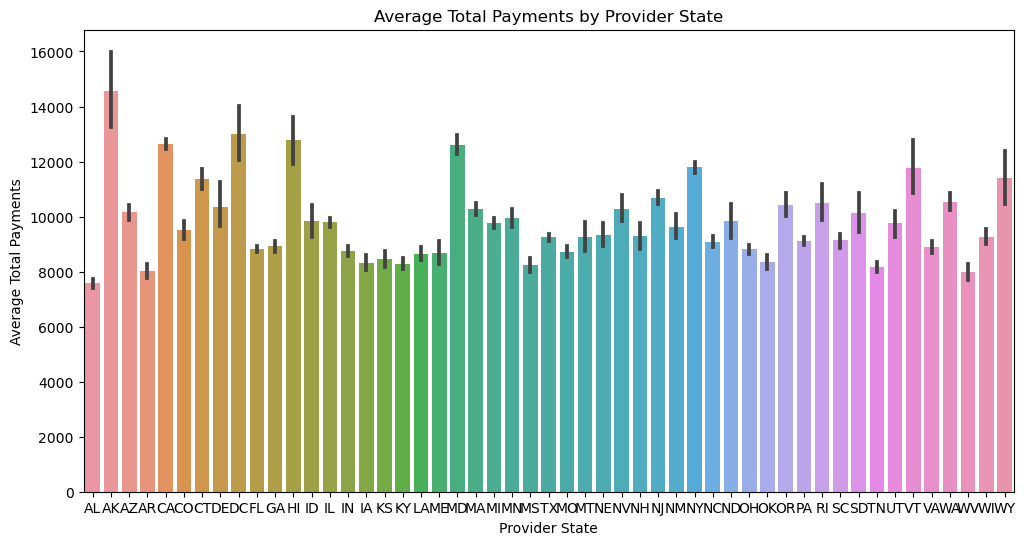

In [10]:
# Average Total Payments by Provider State using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Provider State', y='Average Total Payments', data=df)
plt.title('Average Total Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Total Payments')
plt.show()


# the interactions of two or three variables.

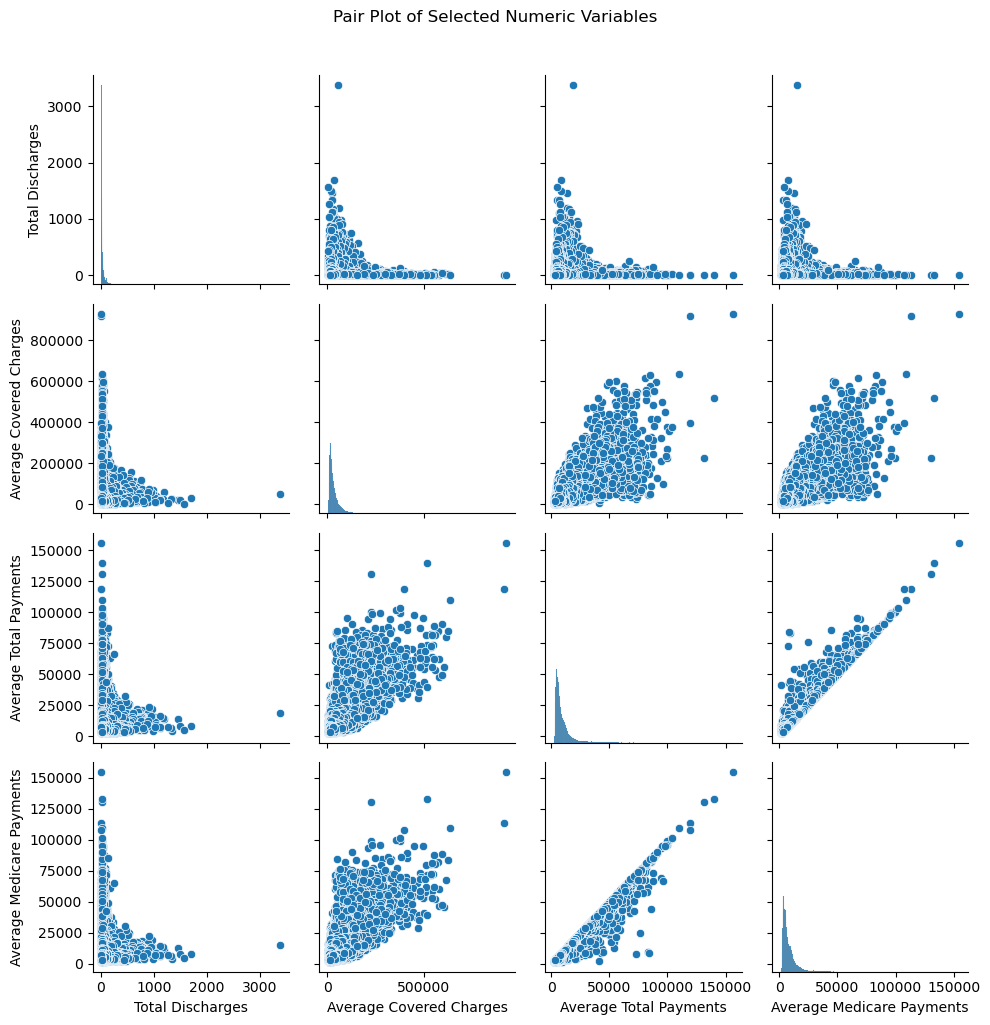

In [11]:

df.columns = df.columns.str.strip()

# Convert monetary columns to numeric
monetary_columns = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
df[monetary_columns] = df[monetary_columns].replace('[\$,]', '', regex=True).astype(float)

# Selecting a subset of columns for pair plot and heatmap
selected_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Pair Plot for selected numeric variables
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()



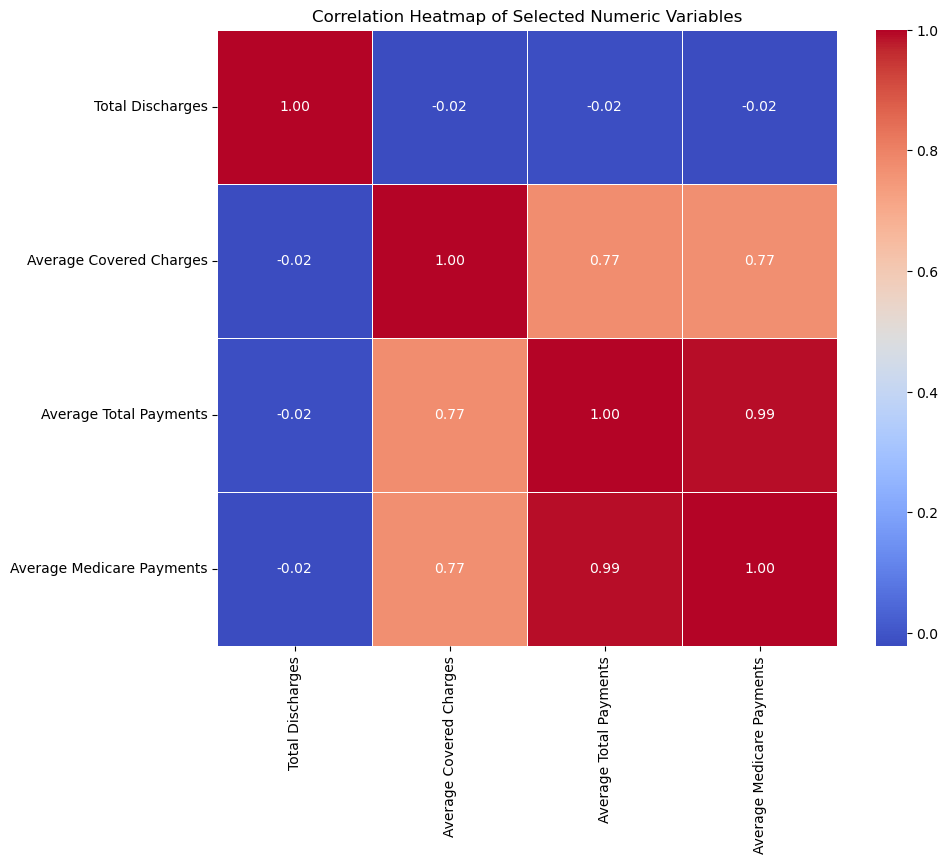

In [12]:
# Heatmap to show correlations between numeric variables
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numeric Variables')
plt.show()

### 3. Create 20 features

In [13]:
df['Average Covered Charges'] = df['Average Covered Charges'].replace('[\$,]', '', regex=True).astype(float)
df['Average Total Payments'] = df['Average Total Payments'].replace('[\$,]', '', regex=True).astype(float)
df['Average Medicare Payments'] = df['Average Medicare Payments'].replace('[\$,]', '', regex=True).astype(float)

# Now, perform the binning
charges = df['Average Covered Charges']
total_payments = df['Average Total Payments']
med_payments = df['Average Medicare Payments']

# Define the number of bins
num_bins = 5

# Custom bin edges
bin_edges = [0, 10000, 20000, 30000, 40000, max(charges)]

# Label the bins
label_names = [f'{str(i+1)}' for i in range(num_bins)]

# Create custom bins
custom_bins = pd.cut(charges, bins=bin_edges, labels=label_names)
total_payments_custom_bins = pd.cut(total_payments, bins=bin_edges, labels=label_names)
med_payments_custom_bins = pd.cut(med_payments, bins=bin_edges, labels=label_names)

# Add the new binned column to the DataFrame
df['Charges_Bin'] = custom_bins
df['Total_Payments_Bin'] = total_payments_custom_bins
df['Medicare_Payments_Bin'] = med_payments_custom_bins
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1


In [14]:
df['Total_Discharge_Cost'] = df['Total Discharges'] * df['Average Covered Charges']
df['Total_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Total Payments']
df['Total_Medicare_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Medicare Payments']
df['Medicare_to_Total_Payment_Ratio'] = (df['Average Medicare Payments'] / df['Average Total Payments'])*100
df['Payment_to_Charge_Ratio'] = (df['Average Total Payments'] / df['Average Covered Charges'])*100
df.head()


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Payment_All_Discharges,Total_Medicare_Payment_All_Discharges,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,525728.84,433499.43,82.456848,17.526402
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,81025.98,69673.94,85.989629,38.247604
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,130438.80,106890.96,81.947212,14.469905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,135439.00,103229.00,76.218076,38.701612
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,101849.94,87325.92,85.739785,17.887275


In [15]:
# Create a label encoder object
le = LabelEncoder()

# Apply label encoder to each categorical column
df['Provider State Encoded'] = le.fit_transform(df['Provider State'])
df['Provider City Encoded'] = le.fit_transform(df['Provider City'])
df['DRG Definition Encoded'] = le.fit_transform(df['DRG Definition'])

In [16]:
# Frequency encoding for 'Provider State', 'DRG Definition', 'Provider City'
state_freq = ((df['Provider State'].value_counts() / len(df)) * 100).round(2) 
df['Provider State Freq'] = df['Provider State'].map(state_freq)

city_freq = ((df['Provider City'].value_counts() / len(df)) *100).round(2)
df['Provider City Freq'] = df['Provider City'].map(city_freq)

drg_freq = ((df['DRG Definition'].value_counts() / len(df)) * 100).round(2)
df['DRG Definition Freq'] = df['DRG Definition'].map(drg_freq)

In [17]:
drg_discharges = df.groupby('DRG Definition')['Total Discharges'].sum()
drg_discharges_df = drg_discharges.reset_index()

# Rename the columns for clarity
drg_discharges_df.columns = ['DRG Definition', 'Total Discharges']
sorted_drg_discharges = drg_discharges.sort_values(ascending=True)

# Find the indices to split the sorted series into three parts
split_indices = [int(1/3 * len(sorted_drg_discharges)), int(2/3 * len(sorted_drg_discharges))]

# Split the sorted series into three parts and assign reverse categories
high_discharge_drg = sorted_drg_discharges[:split_indices[0]].to_frame(name='Total Discharges')
high_discharge_drg['Category'] = 'High'

medium_discharge_drg = sorted_drg_discharges[split_indices[0]:split_indices[1]].to_frame(name='Total Discharges')
medium_discharge_drg['Category'] = 'Medium'

low_discharge_drg = sorted_drg_discharges[split_indices[1]:].to_frame(name='Total Discharges')
low_discharge_drg['Category'] = 'Low'

# Combine them back into a single DataFrame
categorized_drg_discharges = pd.concat([high_discharge_drg, medium_discharge_drg, low_discharge_drg]).reset_index()

# Create a dictionary for mapping DRG Definition to Category
drg_category_map = dict(zip(categorized_drg_discharges['DRG Definition'], categorized_drg_discharges['Category']))

# Map the Category to the original df
df['Procedure Complexity'] = df['DRG Definition'].map(drg_category_map)

numerical_encoding = {'Low': 0, 'Medium': 1, 'High':2}
df['Procedure Complexity Number'] = df['Procedure Complexity'].map(numerical_encoding).astype(int)

In [18]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Payment_All_Discharges,Total_Medicare_Payment_All_Discharges,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Provider State Freq,Provider City Freq,DRG Definition Freq,Procedure Complexity,Procedure Complexity Number
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,525728.84,433499.43,82.456848,17.526402,1,454,0,2.23,0.10,0.66,Medium,1
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,81025.98,69673.94,85.989629,38.247604,1,177,0,2.23,0.03,0.66,Medium,1
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,130438.80,106890.96,81.947212,14.469905,1,582,0,2.23,0.21,0.66,Medium,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,135439.00,103229.00,76.218076,38.701612,1,162,0,2.23,0.33,0.66,Medium,1
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,101849.94,87325.92,85.739785,17.887275,1,13,0,2.23,0.05,0.66,Medium,1


In [19]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns


In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [21]:
numeric_columns

Index(['Provider Id', 'Provider Zip Code', 'Total Discharges',
       'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Total_Discharge_Cost',
       'Total_Payment_All_Discharges', 'Total_Medicare_Payment_All_Discharges',
       'Medicare_to_Total_Payment_Ratio', 'Payment_to_Charge_Ratio',
       'Provider State Encoded', 'Provider City Encoded',
       'DRG Definition Encoded', 'Provider State Freq', 'Provider City Freq',
       'DRG Definition Freq', 'Procedure Complexity Number'],
      dtype='object')

In [22]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Charges_Bin', 'Total_Payments_Bin',
       'Medicare_Payments_Bin', 'Total_Discharge_Cost',
       'Total_Payment_All_Discharges', 'Total_Medicare_Payment_All_Discharges',
       'Medicare_to_Total_Payment_Ratio', 'Payment_to_Charge_Ratio',
       'Provider State Encoded', 'Provider City Encoded',
       'DRG Definition Encoded', 'Provider State Freq', 'Provider City Freq',
       'DRG Definition Freq', 'Procedure Complexity',
       'Procedure Complexity Number'],
      dtype='object')

In [23]:
kmean= KMeans(16)
kmean.fit(df[['Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments']])
labels=kmean.labels_

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Payment_All_Discharges,Total_Medicare_Payment_All_Discharges,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Provider State Freq,Provider City Freq,DRG Definition Freq,Procedure Complexity,Procedure Complexity Number,cluster
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,525728.84,433499.43,82.456848,17.526402,1,454,0,2.23,0.10,0.66,Medium,1,9
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,81025.98,69673.94,85.989629,38.247604,1,177,0,2.23,0.03,0.66,Medium,1,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,130438.80,106890.96,81.947212,14.469905,1,582,0,2.23,0.21,0.66,Medium,1,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,135439.00,103229.00,76.218076,38.701612,1,162,0,2.23,0.33,0.66,Medium,1,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,101849.94,87325.92,85.739785,17.887275,1,13,0,2.23,0.05,0.66,Medium,1,9


In [25]:
clusters[clusters['cluster']==9]['Provider Id'].value_counts()

50093     34
330023    32
290001    31
450388    30
390115    30
          ..
360092     1
100314     1
410010     1
310070     1
140100     1
Name: Provider Id, Length: 2718, dtype: int64

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


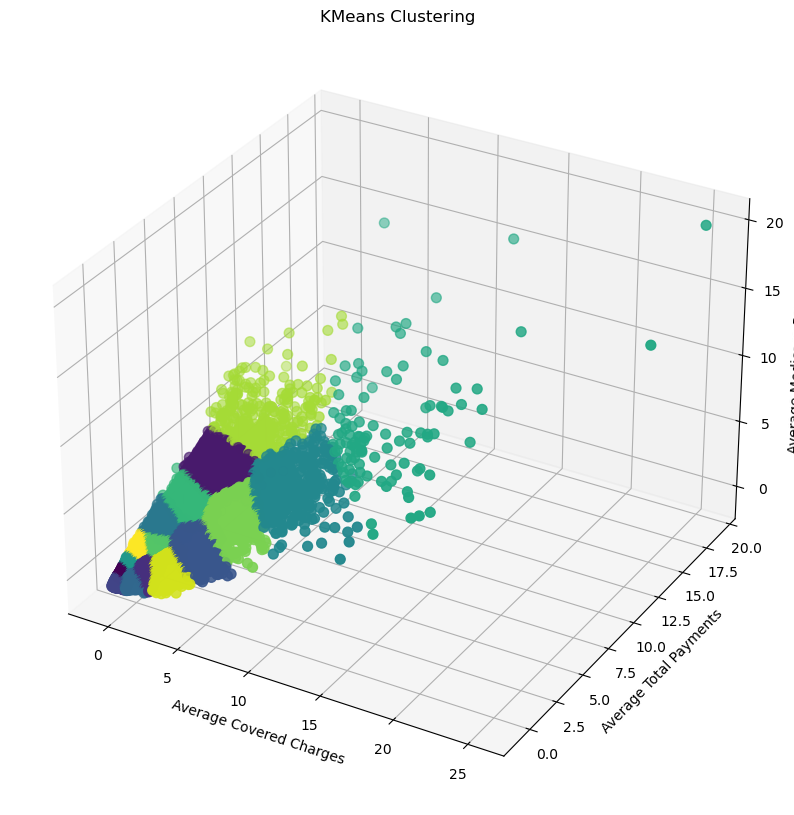

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
columns_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments',
                          'Total_Payment_All_Discharges',]

# Extract the columns you want to standardize
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the original DataFrame, excluding the columns to be standardized
df_result = pd.concat([df.drop(columns=columns_to_standardize), df_standardized], axis=1)


# Assuming 'Average Covered Charges', 'Average Total Payments', and 'Average Medicare Payments' are the features
features = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Fit KMeans model
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(df_result[features])

# Get cluster labels
labels = kmeans.labels_

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_result[features[0]], df_result[features[1]], df_result[features[2]], c=labels, cmap='viridis', s=50)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('KMeans Clustering')

plt.show()


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


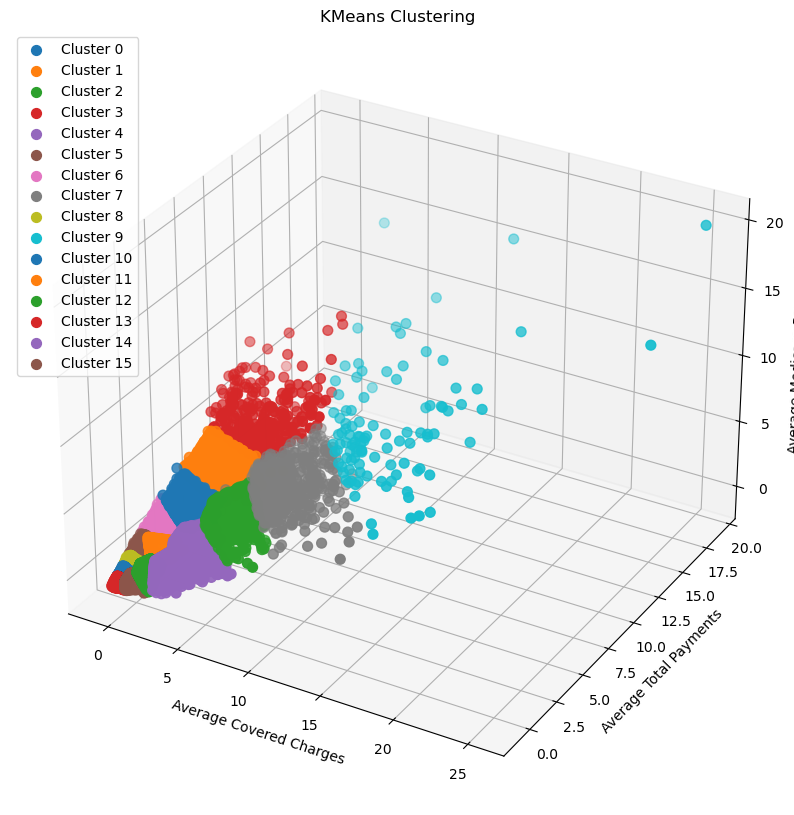

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
columns_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments', 'Total_Payment_All_Discharges']

# Extract the columns you want to standardize
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the original DataFrame, excluding the columns to be standardized
df_result = pd.concat([df.drop(columns=columns_to_standardize), df_standardized], axis=1)

# Assuming 'Average Covered Charges', 'Average Total Payments', and 'Average Medicare Payments' are the features
features = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Fit KMeans model
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(df_result[features])

# Get cluster labels
labels = kmeans.labels_

# Plot 3D scatter plot with legend
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

# Loop through each cluster label and plot a scatter plot for that cluster
for cluster_label in range(16):
    cluster_indices = labels == cluster_label
    ax.scatter(df_result.loc[cluster_indices, features[0]],
               df_result.loc[cluster_indices, features[1]],
               df_result.loc[cluster_indices, features[2]],
               label=f'Cluster {cluster_label}',
               s=50)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('KMeans Clustering')

# Add legend
ax.legend()

plt.show()


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


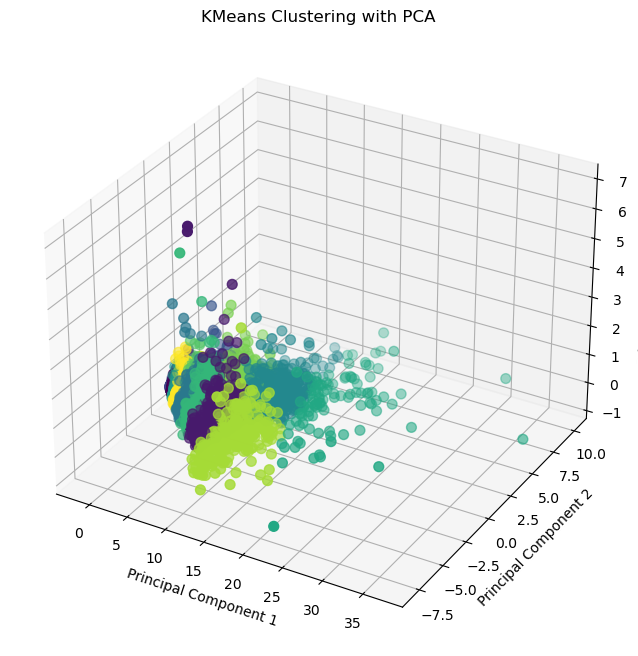

In [189]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
columns_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments',
                          'Total_Payment_All_Discharges',]

# Extract the columns you want to standardize
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the original DataFrame, excluding the columns to be standardized
df_result = pd.concat([df.drop(columns=columns_to_standardize), df_standardized], axis=1)

# Assuming 'Average Covered Charges', 'Average Total Payments', and 'Average Medicare Payments' are the features
features = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_result[features])

# Fit KMeans model on PCA-transformed data
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels
labels = kmeans.labels_

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('KMeans Clustering with PCA')

plt.show()


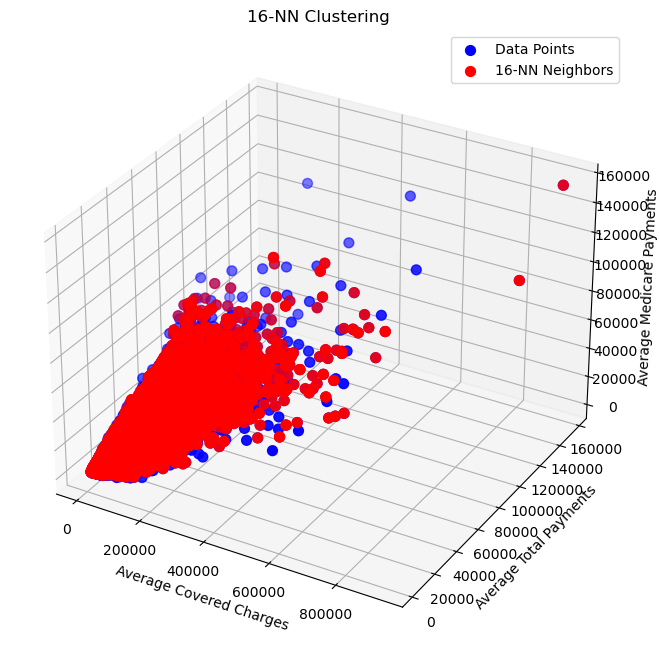

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# Assuming 'Average Covered Charges', 'Average Total Payments', and 'Average Medicare Payments' are the features
features = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Fit Nearest Neighbors model
k_neighbors = 16  # You can adjust this value based on your needs
nn_model = NearestNeighbors(n_neighbors=k_neighbors)
nn_model.fit(df[features])

# Find nearest neighbors
distances, indices = nn_model.kneighbors(df[features])

# Plot 3D scatter plot with nearest neighbors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(df[features[0]], df[features[1]], df[features[2]], c='blue', s=50, label='Data Points')

# Scatter plot for nearest neighbors
ax.scatter(df[features[0]].iloc[indices[:, 1]], df[features[1]].iloc[indices[:, 1]], df[features[2]].iloc[indices[:, 1]],
           c='red', s=50, label=f'{k_neighbors}-NN Neighbors')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title(f'{k_neighbors}-NN Clustering')
ax.legend()

plt.show()


# K-NN

In [28]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
columns_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments',
                          'Total_Payment_All_Discharges',]

# Extract the columns you want to standardize
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the original DataFrame, excluding the columns to be standardized
df_result = pd.concat([df.drop(columns=columns_to_standardize), df_standardized], axis=1)


In [29]:
# dist = 1 - cosine_similarity(df[numeric_columns])

pca = PCA(2)
pca.fit(df_result[columns_to_standardize])
X_PCA = pca.transform(df_result[columns_to_standardize])
X_PCA.shape

(163065, 2)

In [30]:
df_result.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Charges_Bin', 'Total_Payments_Bin',
       'Medicare_Payments_Bin', 'Total_Discharge_Cost',
       'Total_Medicare_Payment_All_Discharges',
       'Medicare_to_Total_Payment_Ratio', 'Payment_to_Charge_Ratio',
       'Provider State Encoded', 'Provider City Encoded',
       'DRG Definition Encoded', 'Provider State Freq', 'Provider City Freq',
       'DRG Definition Freq', 'Procedure Complexity',
       'Procedure Complexity Number', 'Outlier Score',
       'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Total_Payment_All_Discharges'],
      dtype='object')

In [31]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05) 
X_train =df_result[['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments',
                   'Provider City Encoded','Provider State Encoded','Total_Payment_All_Discharges']]
knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
# y_test_scores = knn.decision_function(X_test)
# y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
# print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 155894, 1: 7171}
The threshold for the defined comtanimation rate: 1.7069984032581385


In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('KNN outlier score')
plt.show()

In [32]:
threshold = knn.threshold_ # Or other value from the above histogram


def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider City Encoded,Provider State Encoded,Total_Payment_All_Discharges,Anomaly_Score
0,Normal,155894,95.602367,-0.10,-0.12,-0.12,963.32,24.23,-0.11,0.32
1,Outlier,7171,4.397633,2.18,2.65,2.60,987.58,23.18,2.30,3.22


# Explain what PCA and KNNs are

Principal Component Analysis (PCA) and k-Nearest Neighbors (KNN) are both machine learning techniques used for different purposes.

1. **Principal Component Analysis (PCA):**
   - **Objective:** PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much of the original variability as possible.
   - **How it works:** PCA identifies the principal components, which are the directions in the data that capture the most variance. These components are linear combinations of the original features. The first principal component explains the most variance, the second principal component explains the second most, and so on.
   - **Use cases:**
     - Dimensionality reduction: Reducing the number of features while preserving most of the information.
     - Data visualization: Projecting high-dimensional data into a lower-dimensional space for visualization purposes.
     - Noise reduction: Focusing on the most important features and ignoring less relevant ones.

2. **k-Nearest Neighbors (KNN):**
   - **Objective:** KNN is a supervised machine learning algorithm used for classification and regression tasks. It makes predictions based on the majority class (for classification) or the average of nearest neighbors' values (for regression).
   - **How it works:** Given a new data point, KNN identifies the k nearest data points in the training set based on a chosen distance metric (commonly Euclidean distance). For classification, the class label of the majority of these neighbors is assigned to the new point. For regression, the average of the target values of these neighbors is assigned.
   - **Use cases:**
     - Classification: Assigning a class label to a new data point based on the majority class of its k-nearest neighbors.
     - Regression: Predicting a continuous target variable based on the average of the target values of its k-nearest neighbors.
     - Anomaly detection: Identifying outliers in the data based on the distance to their k-nearest neighbors.

In summary, PCA is a technique for reducing the dimensionality of data, while KNN is a supervised learning algorithm used for classification and regression tasks based on the similarity of data points in a high-dimensional space.